# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

In [2]:
X = pd.read_csv('3D_spatial_network.txt.gz', header = None, names = ['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis = 1).sample(10000)
X.head()

,lat,lon,alt
303798,8.589836,57.115182,7.700476
158998,10.267503,57.408115,68.657142
178640,10.280112,57.617054,7.464112
165903,10.300761,56.995853,1.766809
202198,9.208045,56.682584,11.678611


In [3]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [4]:
XX.head()

,lat,lon,alt
303798,-1.796207,0.115299,-0.779079
158998,0.868993,1.131534,2.514090
178640,0.889024,1.856380,-0.791848
165903,0.921827,-0.298673,-1.099643
202198,-0.814098,-1.385458,-0.564161


In [5]:
min_samples = np.arange(2, 12, 1)
epsilons = np.arange(.05, .5, .01)
all_scores = []
for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        print(min_sample)
        print(epsilon)
        dbscan = DBSCAN(eps = epsilon, min_samples = min_sample)
#         dbscan = DBSCAN(epsilon, min_sample)
        labels = dbscan.fit_predict(XX[['lat','lon', 'alt']])
#         km = KMeans(n_clusters = min_samples, random_state = 1)
#         labels = km.fit_predict(XX[['lon', 'lat', 'alt']])
#         calculate silouette score here
        score = (metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))
        
        scores.append(score)
        
    all_scores.append(scores)

2
0.05
2
0.060000000000000005
2
0.07
2
0.08000000000000002
2
0.09000000000000001
2
0.1
2
0.11000000000000001
2
0.12000000000000001
2
0.13
2
0.14
2
0.15000000000000002
2
0.16000000000000003
2
0.17000000000000004
2
0.18000000000000005
2
0.19
2
0.2
2
0.21000000000000002
2
0.22000000000000003
2
0.23000000000000004
2
0.24000000000000005
2
0.25000000000000006
2
0.26000000000000006
2
0.27
2
0.28
2
0.29000000000000004
2
0.30000000000000004
2
0.31000000000000005
2
0.32000000000000006
2
0.33
2
0.34
2
0.35000000000000003
2
0.36000000000000004
2
0.37000000000000005
2
0.38000000000000006
2
0.39000000000000007
2
0.4000000000000001
2
0.4100000000000001
2
0.42000000000000004
2
0.43000000000000005
2
0.44000000000000006
2
0.45000000000000007
2
0.4600000000000001
2
0.4700000000000001
2
0.4800000000000001
2
0.49000000000000005
3
0.05
3
0.060000000000000005
3
0.07
3
0.08000000000000002
3
0.09000000000000001
3
0.1
3
0.11000000000000001
3
0.12000000000000001
3
0.13
3
0.14
3
0.15000000000000002
3
0.1600000000

11
0.4700000000000001
11
0.4800000000000001
11
0.49000000000000005


<IPython.core.display.Javascript object>


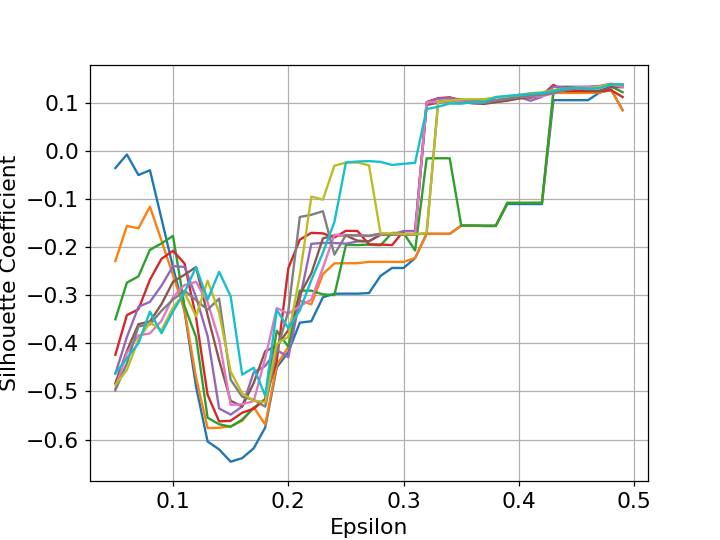

In [15]:
# plot the results
all_scores_new = np.transpose(all_scores)plt.figure()
plt.plot(epsilons, all_scores_new)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [18]:
data = pd.read_csv('bikeshare_hour_count.csv', index_col = False)
data = data.drop(['tuesday'], axis = 1)
data = data.drop(['wednesday'], axis = 1)
data = data.drop(['thursday'], axis = 1)
data = data.drop(['friday'], axis = 1)
data = data.drop(['saturday'], axis = 1)
data = data.drop(['sunday'], axis = 1)
data

,hour,monday
0,0.0,21
1,0.1,39
2,0.2,31
3,0.3,26
4,0.4,19
...,...,...
235,23.5,36
236,23.6,37
237,23.7,30
238,23.8,33


In [24]:
data_new = pd.read_csv('bikeshare.csv.gz', index_col = False, nrows=50000)
data_new.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


In [21]:
df = data.copy()

df['hour'] = (df.hour - df.hour.mean())/df.hour.std()
df['monday'] = (df.monday - df.monday.mean())/df.monday.std()

In [24]:
k_range = range(2, 40)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 1)
    labels = km.fit_predict(df[['hour', 'monday']])
    scores.append(metrics.silhouette_score(df[['hour', 'monday']], labels))

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

<IPython.core.display.Javascript object>


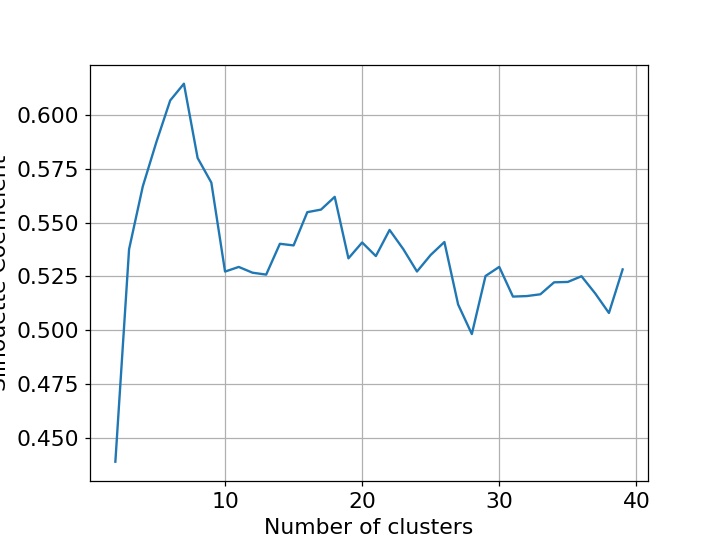

In [25]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

In [25]:
df_new = data_new.rename(columns={"Duration (ms)": "duration", "Start station number": "start_station_number"})

df_new['start_station_number'] = (df_new.start_station_number - df_new.start_station_number.mean())/df_new.start_station_number.std()
df_new['duration'] = (df_new.duration - df_new.duration.mean())/df_new.duration.std()

In [26]:
k_range = range(2, 40)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 1)
    labels = km.fit_predict(df_new[['start_station_number', 'duration']])
    scores.append(metrics.silhouette_score(df_new[['start_station_number', 'duration']], labels))

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\clust

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>


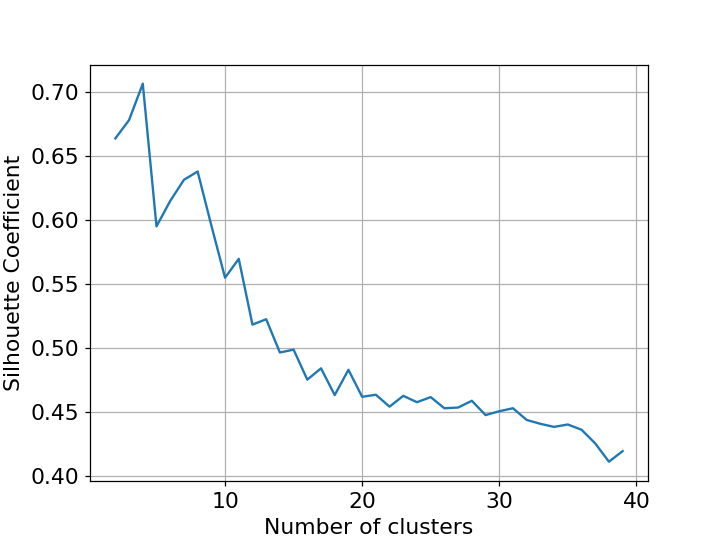

In [27]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()